In [34]:
from google.colab import files
uploaded = files.upload()


Saving ab_test_data.csv to ab_test_data (2).csv


In [35]:
import pandas as pd

df = pd.read_csv('ab_test_data.csv')
df.head()


,user_id,group,converted
0,1,control,0
1,2,control,1
2,3,control,0
3,4,control,0
4,5,control,0


In [36]:
control = df[df['group'] == 'control']
test = df[df['group'] == 'test']


In [37]:
alpha = 0.05

# H0: No difference in conversion rates
# H1: There is a difference in conversion rates


In [38]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)


Control Conversion Rate: 0.138
Test Conversion Rate: 0.14


In [39]:
from scipy.stats import chi2_contingency

conversion_table = pd.crosstab(df['group'], df['converted'])
chi2, p_value, dof, expected = chi2_contingency(conversion_table)

print("Chi-square:", chi2)
print("P-value:", p_value)


Chi-square: 0.0
P-value: 1.0


In [40]:
if p_value < alpha:
    result = "Reject H0 (Statistically Significant)"
else:
    result = "Fail to Reject H0 (Not Significant)"

result


'Fail to Reject H0 (Not Significant)'

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint

control_conv = control['converted'].sum()
test_conv = test['converted'].sum()

control_n = len(control)
test_n = len(test)

ci_control = proportion_confint(control_conv, control_n, alpha=0.05)
ci_test = proportion_confint(test_conv, test_n, alpha=0.05)

ci_control, ci_test


((0.10776873884620457, 0.16823126115379544),
 (0.1095858045639352, 0.17041419543606484))

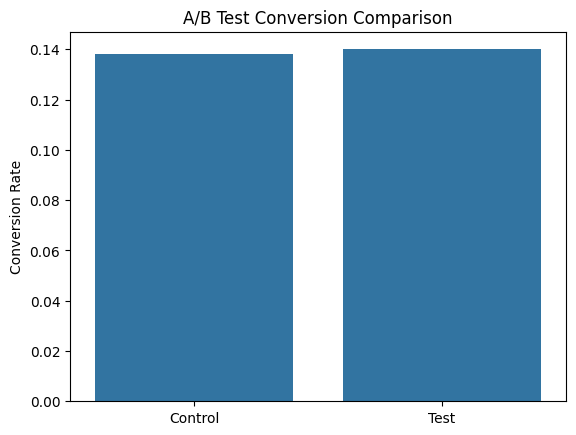

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=['Control', 'Test'], y=[control_rate, test_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()


In [44]:
summary = pd.DataFrame({
    'Group': ['Control', 'Test'],
    'Conversion Rate': [control_rate, test_rate]
})

summary.to_csv('ab_test_summary.csv', index=False)
summary


,Group,Conversion Rate
0,Control,0.138
1,Test,0.140


In [45]:
with open('final_recommendation.txt', 'w') as f:
    f.write(f"""
A/B Testing Result

Control Conversion Rate: {control_rate}
Test Conversion Rate: {test_rate}
P-value: {p_value}

Decision: {result}

Business Recommendation:
""")

print("final_recommendation.txt created")


final_recommendation.txt created
